# EDA and Data Visualisation

### This File mainly consist of graphs and Heatmap that i use as a quick plotting and evaluation during data cleanning and EDA

## Classify columns into categories


In [2]:
#import all relevant libs
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import os
from IPython.display import display
import fnmatch

#sklibrary



In [3]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
print('Train set data: ' ,train.shape)
print('Test set data: ' ,test.shape)


Train set data:  (2051, 81)
Test set data:  (879, 80)


In [4]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


## Plot all numeric columns on histogram plot

In [6]:
numeric_cols=train._get_numeric_data().columns.tolist()

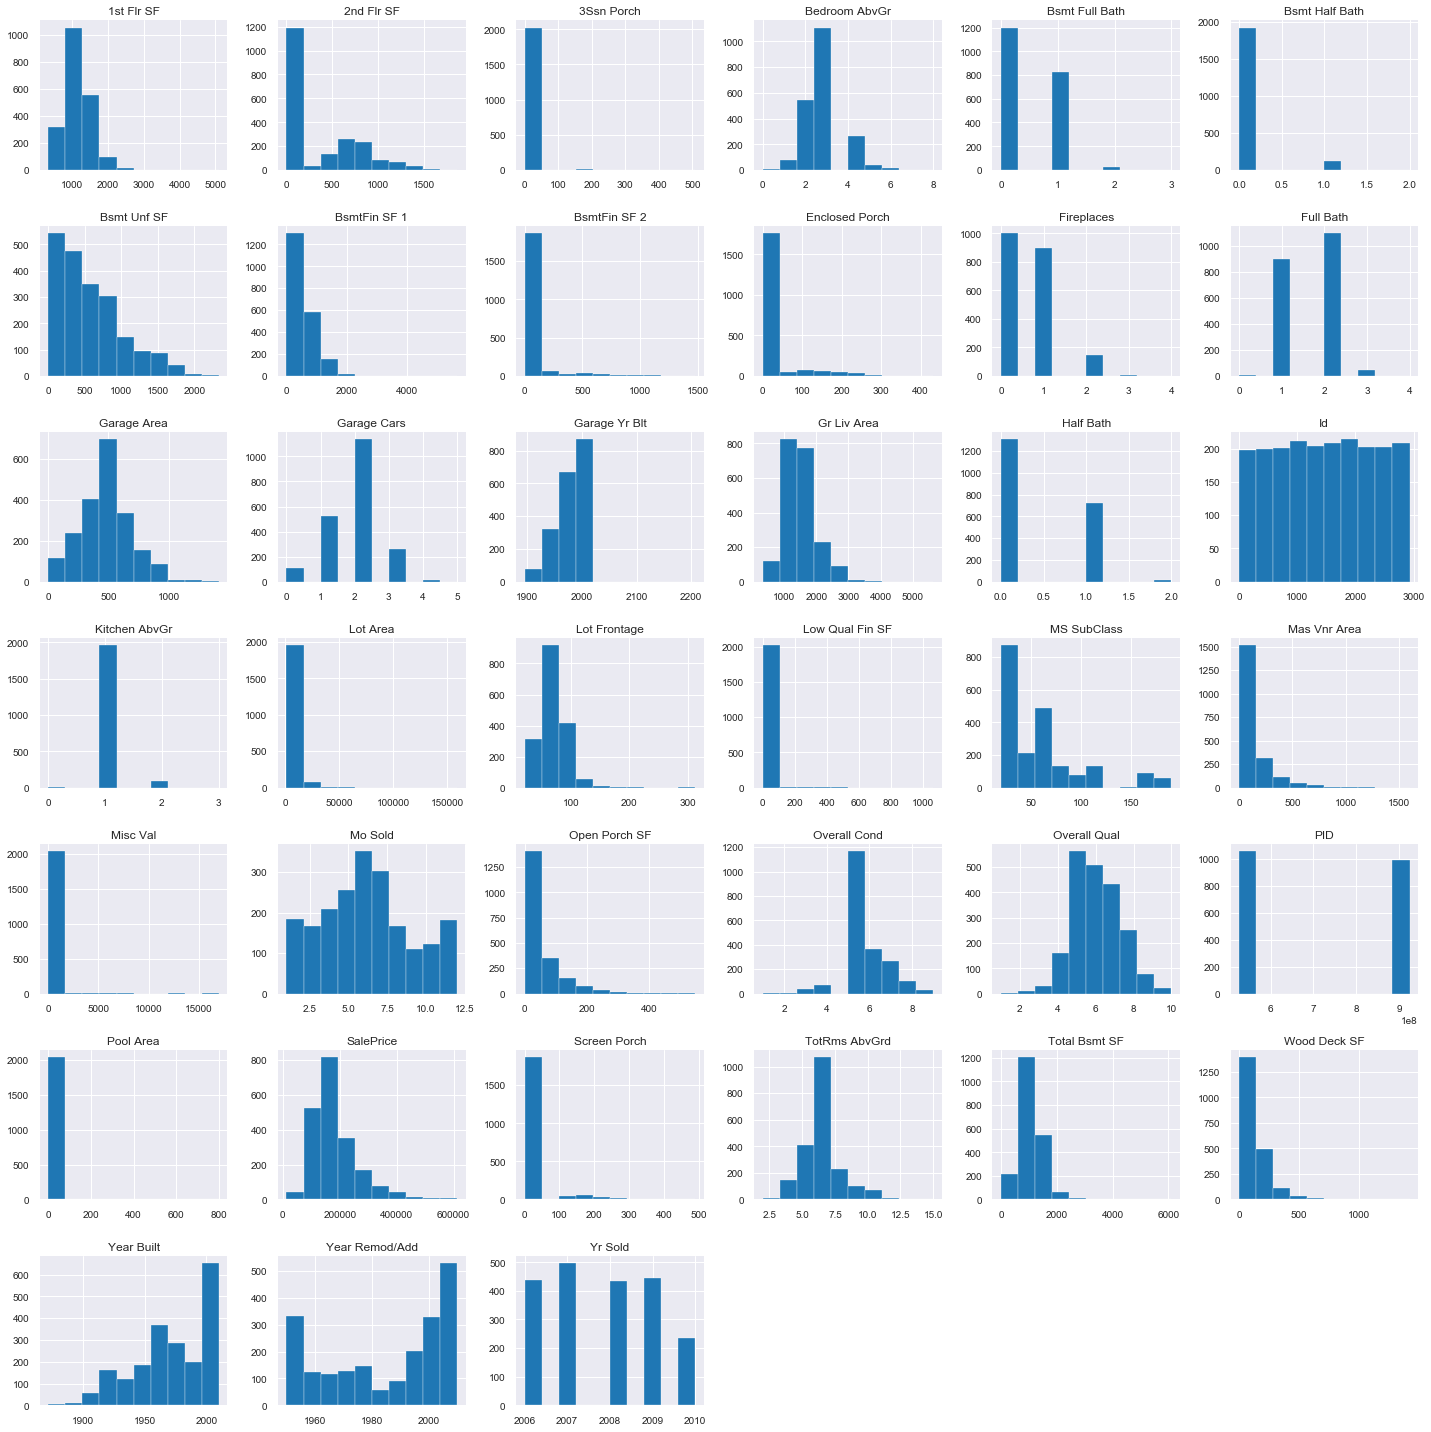

In [7]:
train[numeric_cols].hist(figsize = (20,20))
plt.tight_layout()
plt.show()

Trends to note from numeric data columns
1. Sale price seems to skew to the right, might be following a logistic regression
2. Mo sold seems to be spiking in the median (6)
3. Overall Qual and Overall cond graph do not match ( possibility of missing data/ Null values)

# Plot all categorial columns onto swarmplot (Nominal)

In [8]:
nominal =['Exterior 1st','Mas Vnr Type', 'Central Air', 'Foundation', 'Roof Style', 'MS Zoning',
 'Roof Matl', 'Exterior 2nd','Garage Type', 'Condition 2', 'Alley', 'Bldg Type', 'Neighborhood', 
 'Land Contour', 'Heating', 'Street', 'House Style', 'Lot Config','Condition 1',
 'Misc Feature', 'Sale Type','MS SubClass']

In [9]:
len(nominal)

22

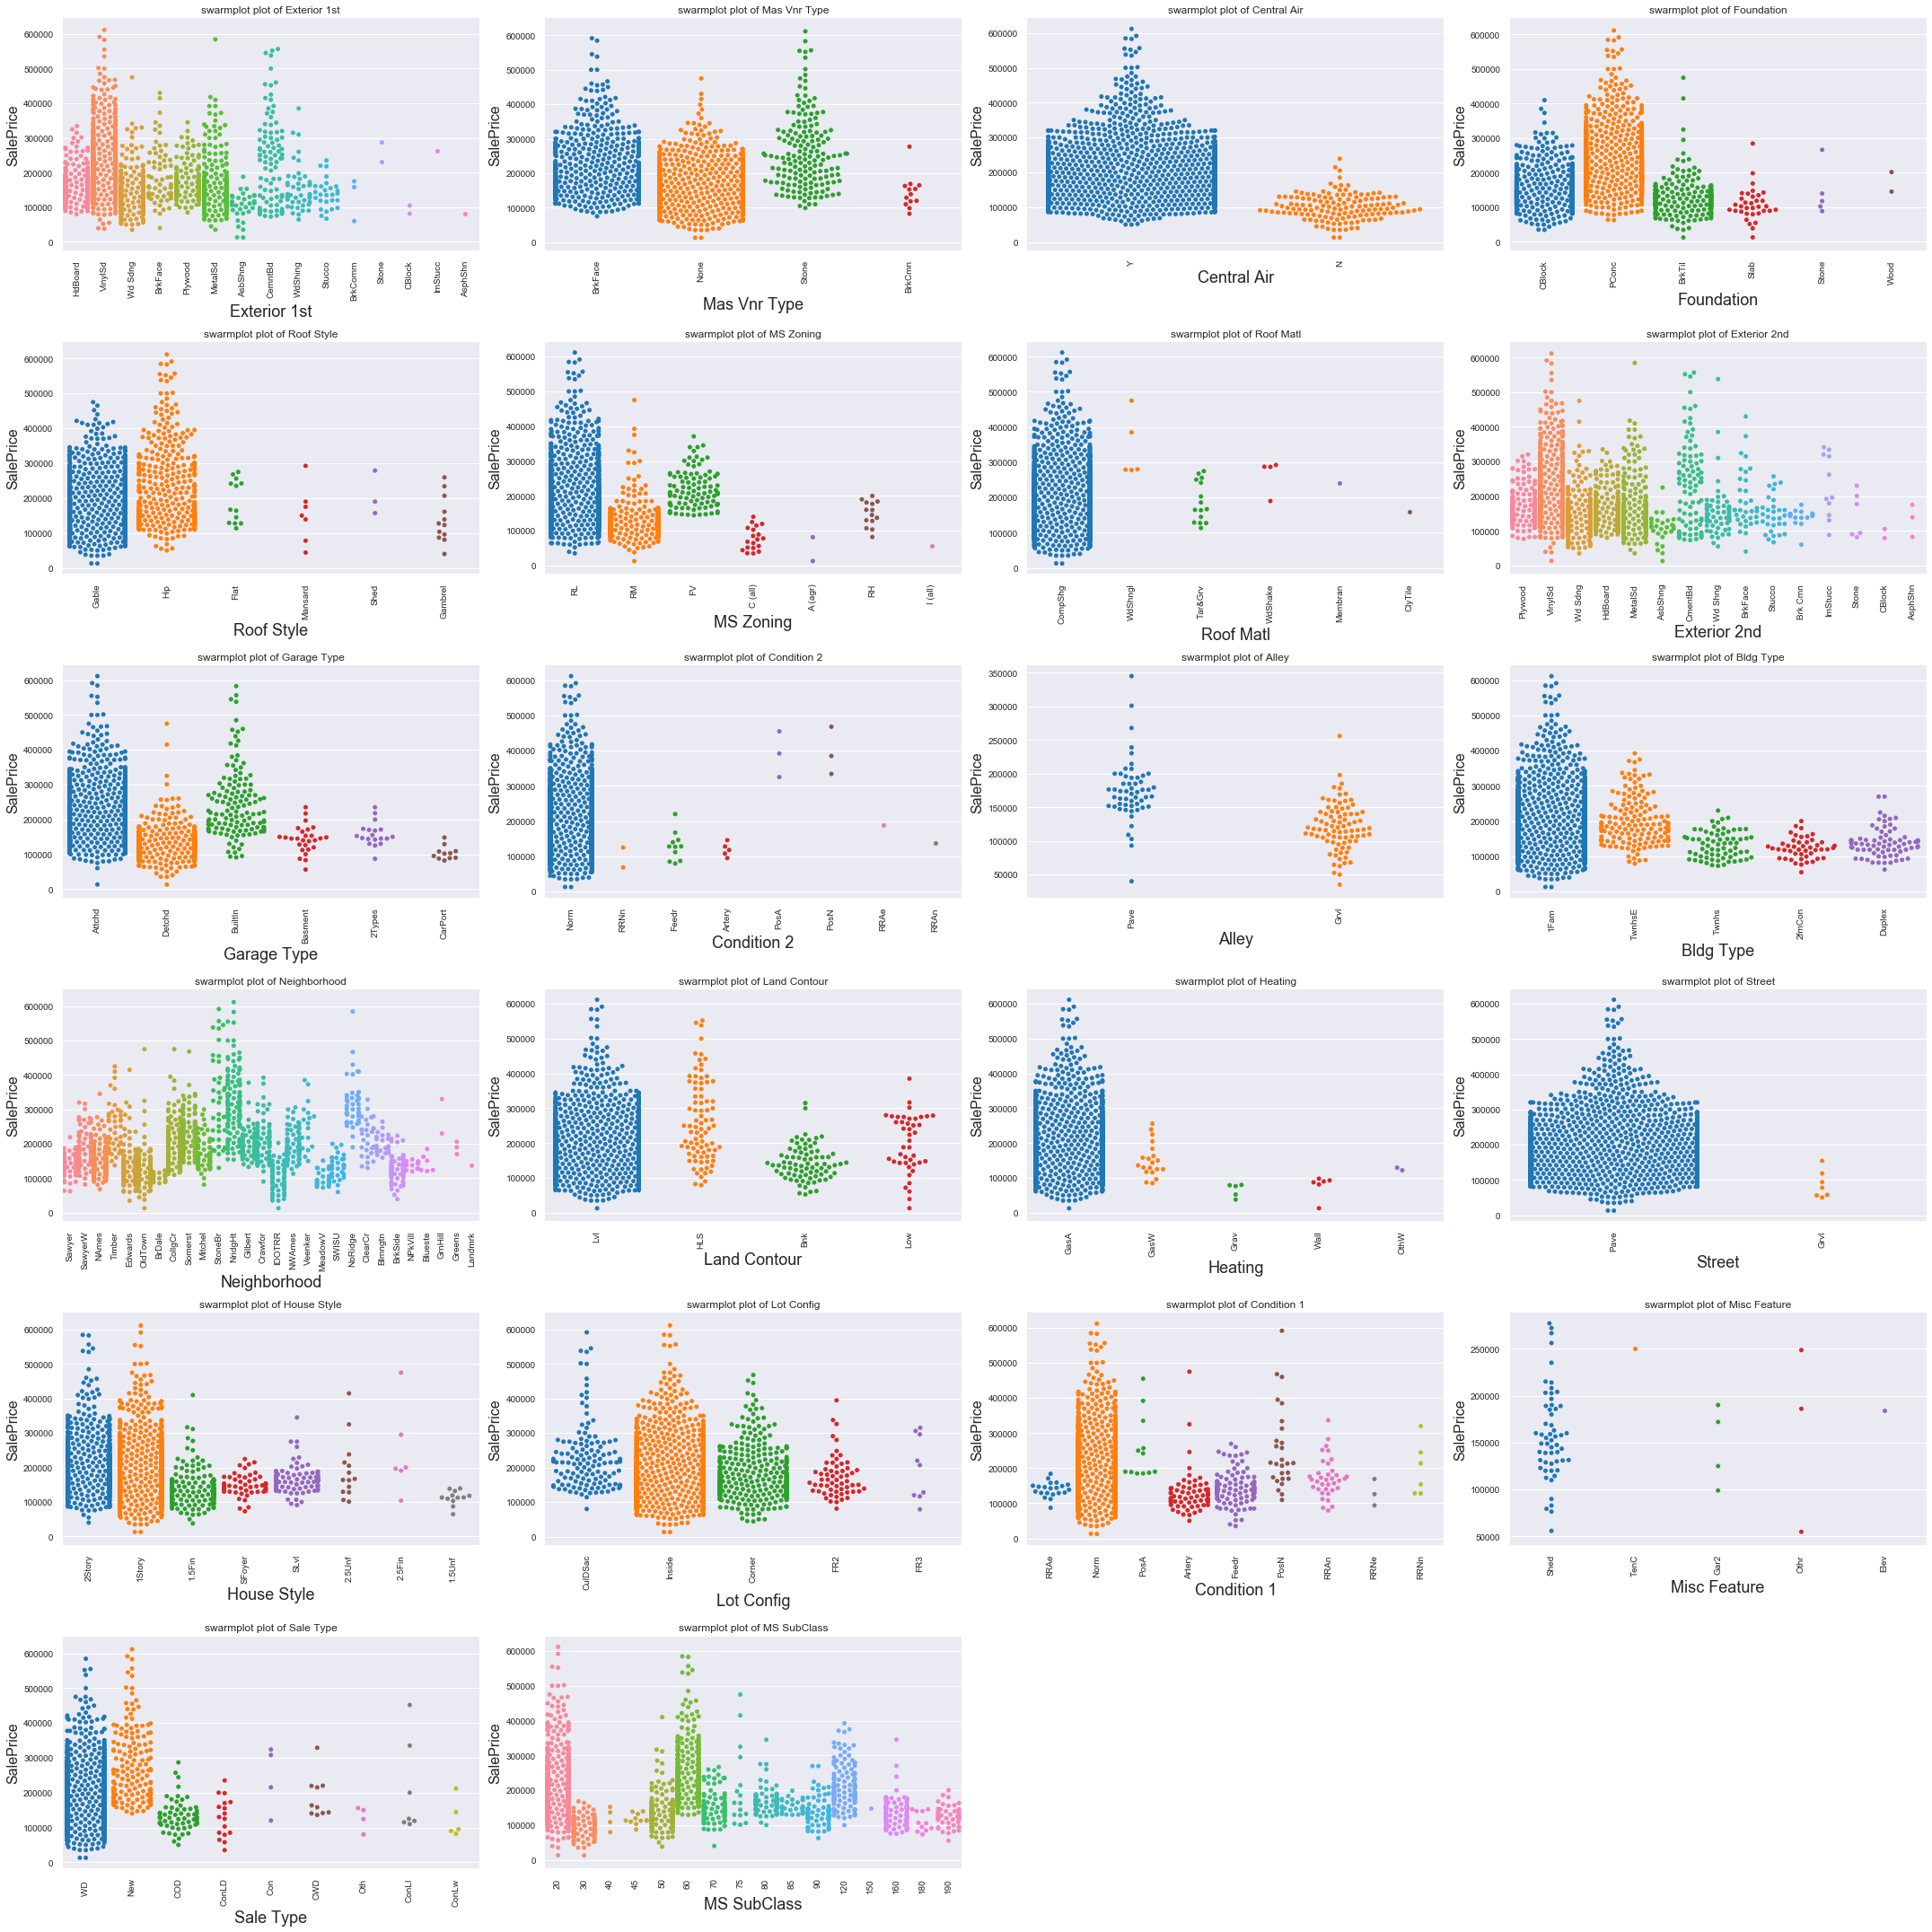

In [10]:
fig = plt.figure(figsize=(30,30))
for i, v in enumerate(nominal):
    plt.subplot(6,4,i+1)
    sns.swarmplot(x=v, y='SalePrice', data=train)
    plt.title('swarmplot plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('SalePrice', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout() 

## Plot all categorial columns onto boxplot (Ordinal)

In [11]:
ordinal = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Heating QC',
 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC', 'BsmtFin Type 1', 
  'BsmtFin Type 2', 'Garage Finish', 'Functional', 'Utilities', 'Land Slope', 'Fence',
 'Paved Drive', 'Electrical', 'Overall Qual', 'Overall Cond', 'Lot Shape']

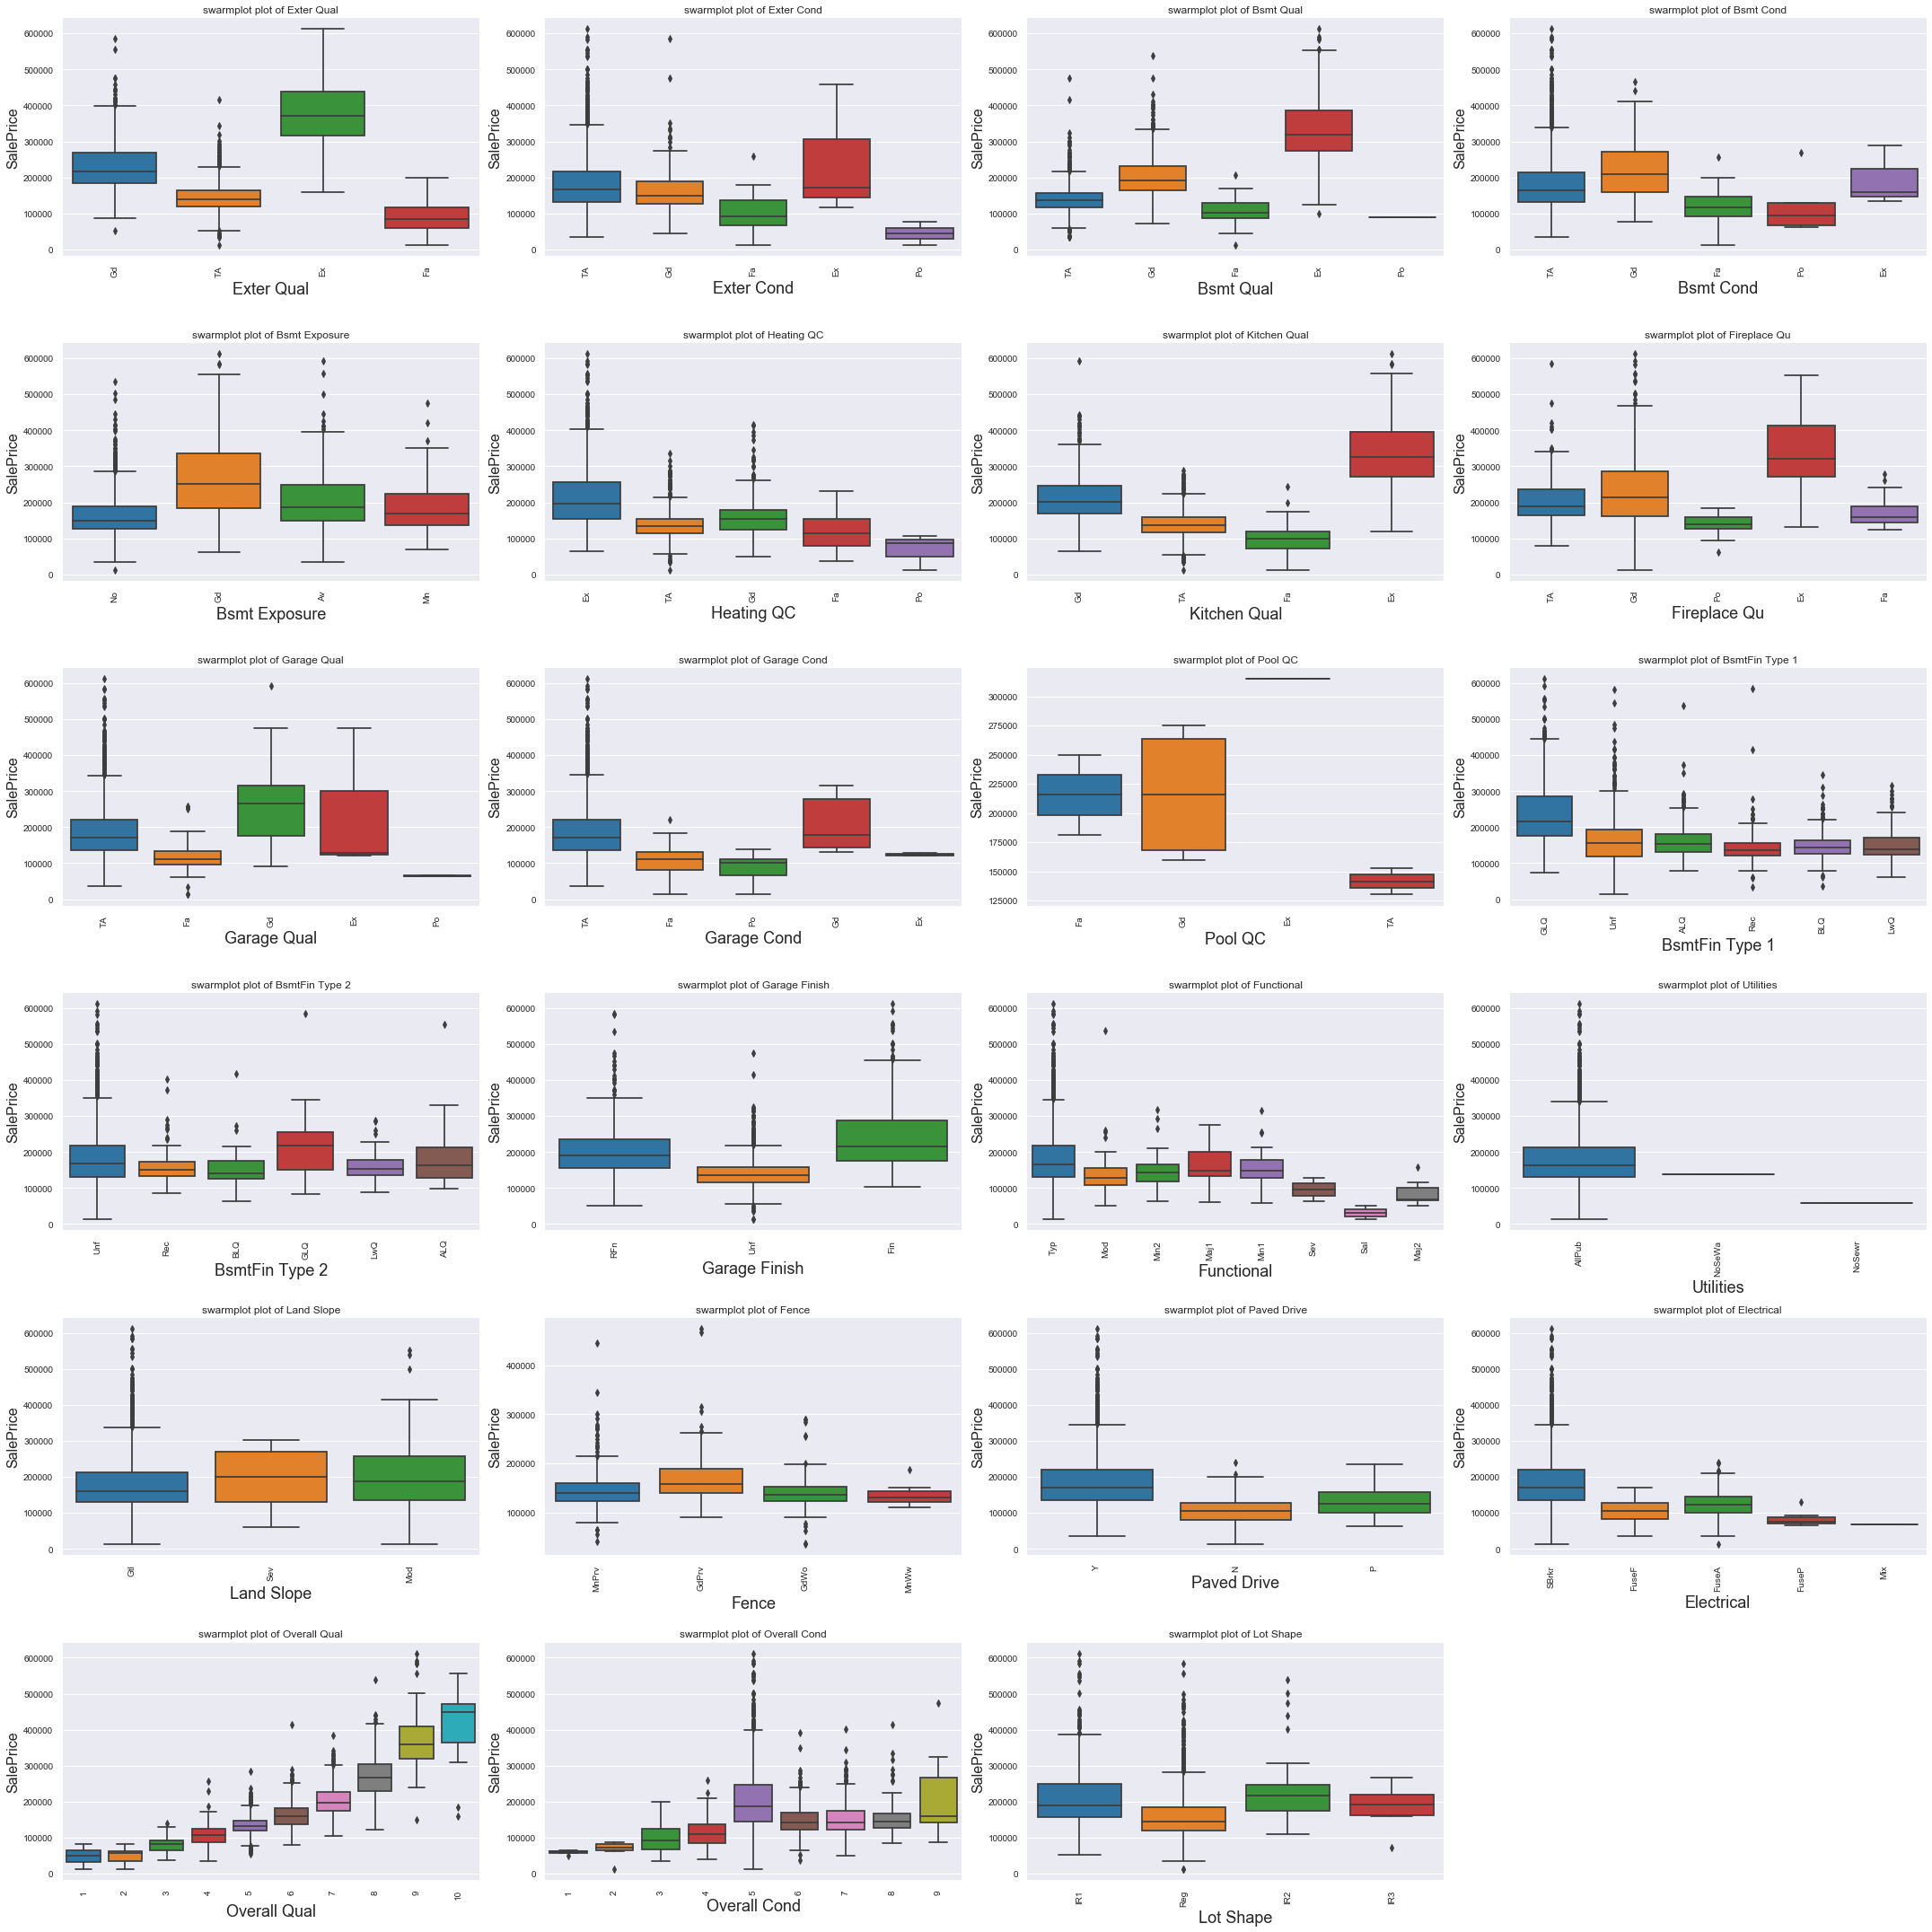

In [12]:
fig = plt.figure(figsize=(30,30))
for i, v in enumerate(ordinal):
    plt.subplot(6,4,i+1)
    sns.boxplot(x=v, y='SalePrice', data=train)
    plt.title('swarmplot plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('SalePrice', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout() 

things to note from ordinal
1. Overall Qual shares a polynominal or exponential relationship with target variable 'Saleprice'
2. Overall Cond should have some outliers considering the spike values under the value '5'.

## Heatmap for correlation for ordinal and numeric 

### Numeric Heatmap

(39, 0)

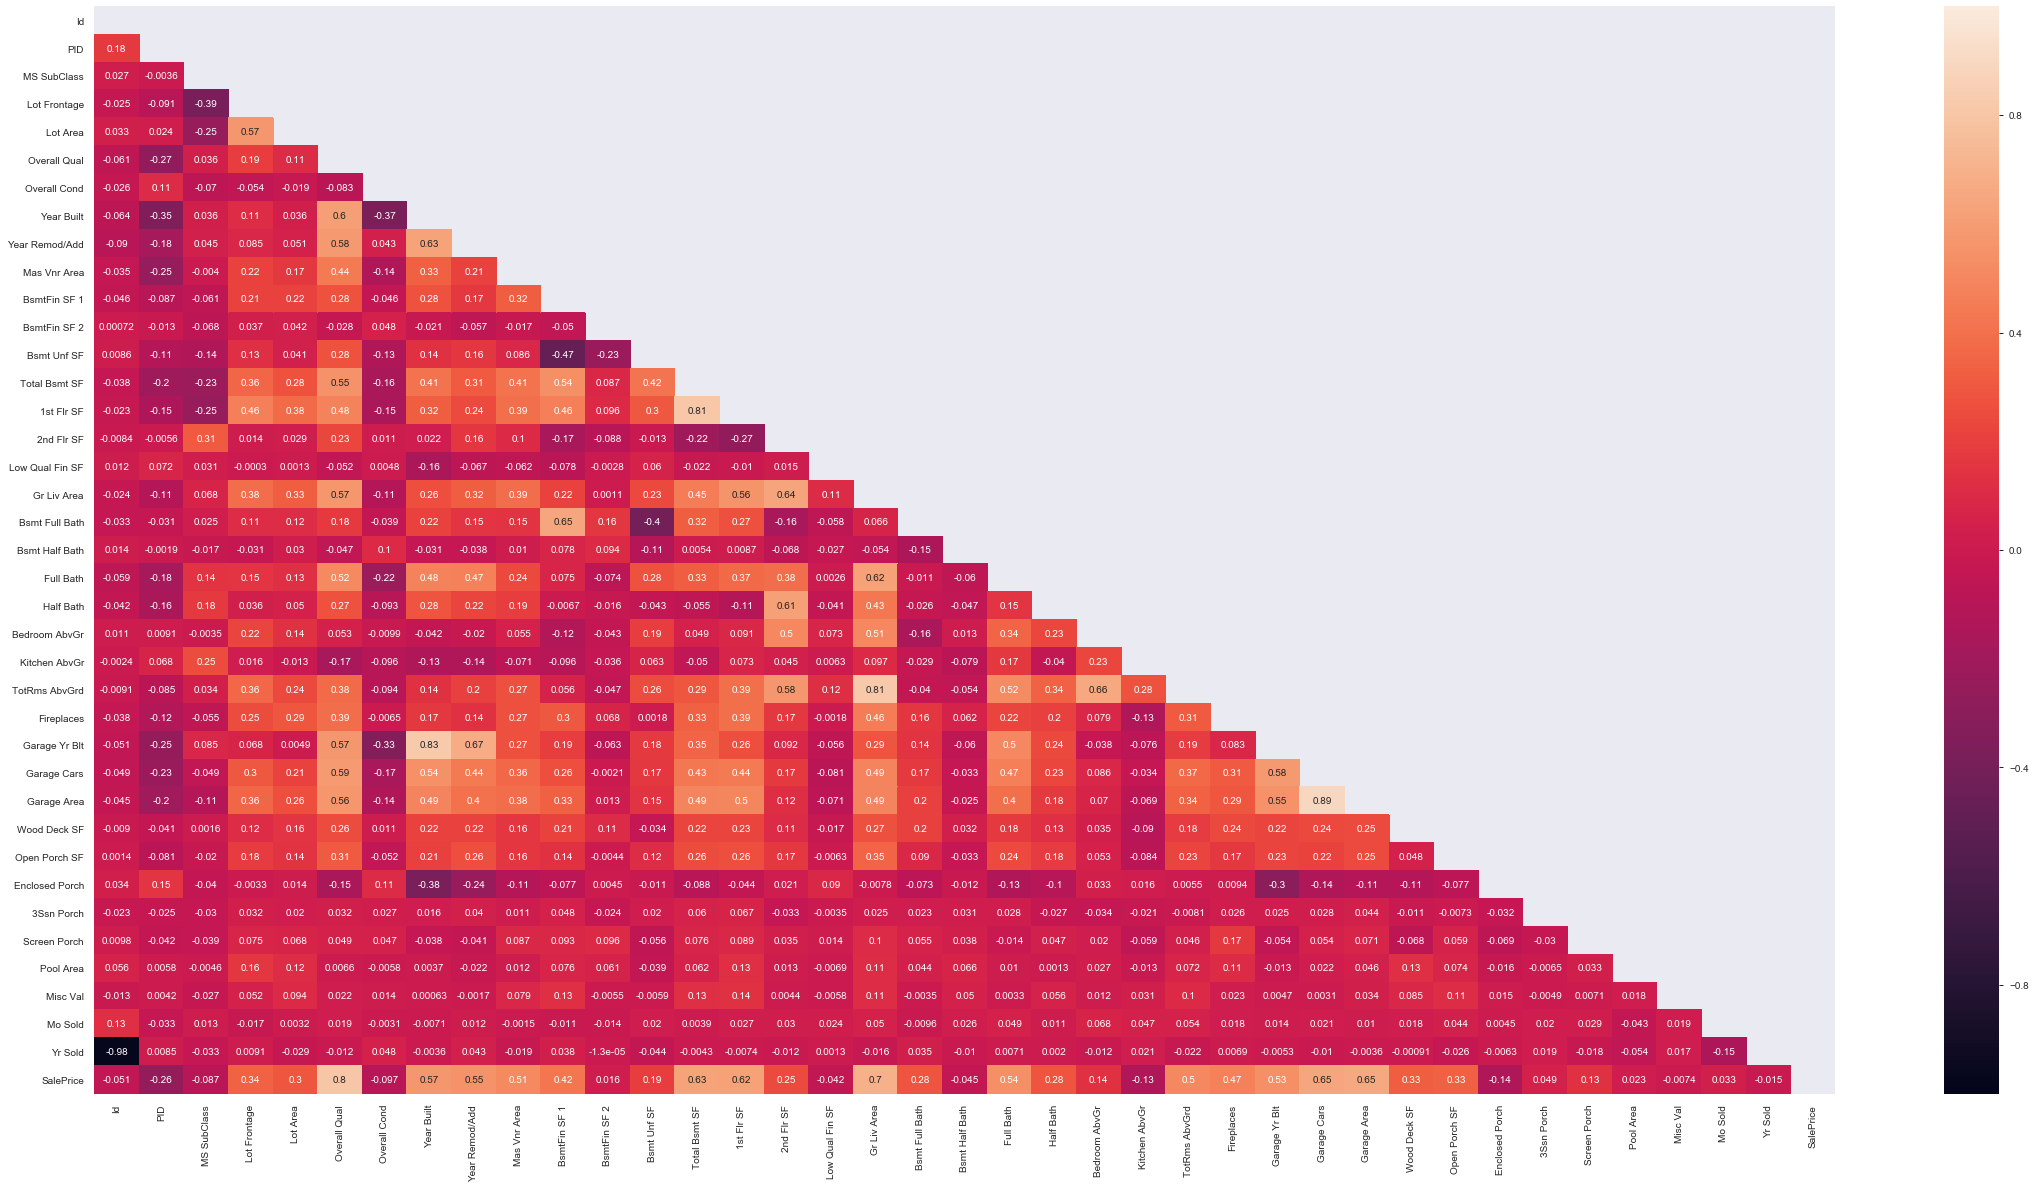

In [13]:
fig = plt.figure(figsize=(39,20))
masking_matrix =np.zeros_like(train[numeric_cols].corr())
masking_matrix[np.triu_indices_from(masking_matrix)] = True

ax = sns.heatmap(train[numeric_cols].corr(),annot = True,mask =masking_matrix, vmax=1, vmin=-1)
ax.get_ylim()
ax.set_ylim(39,0)

In [71]:
numeric_corr =abs(train[numeric_cols].corr()['SalePrice']).sort_values(ascending = False)


(40, 0)

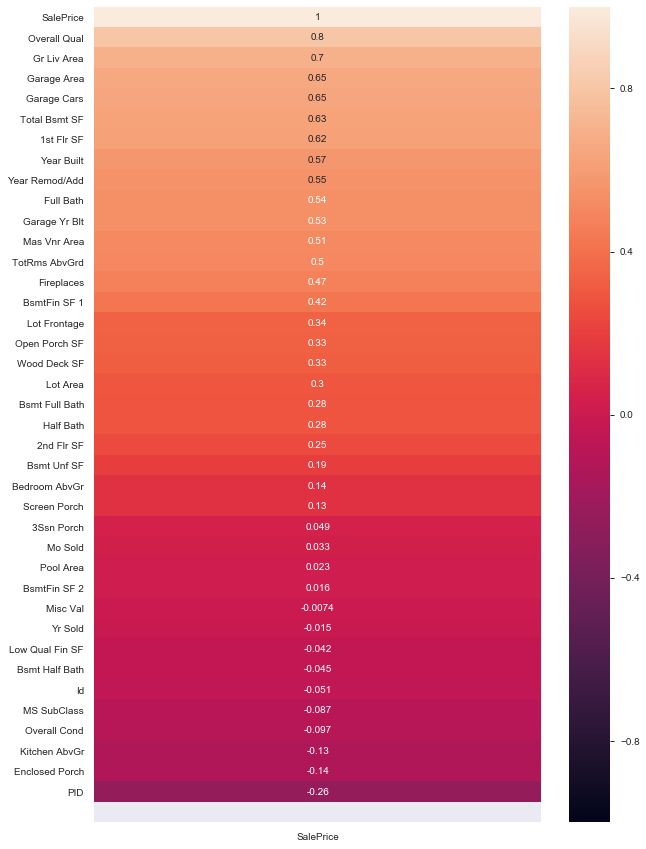

In [72]:
fig = plt.figure(figsize=(10,15))
ax =sns.heatmap(train[numeric_cols].corr()[['SalePrice']].sort_values(by='SalePrice', ascending = False),annot = True, vmin = -1, vmax = 1)
ax.get_ylim()
ax.set_ylim(40,0)